# **Iris Flower Classification**

#### **Jonah Silverstein**

# Summary

#### Description:
This machine learning project focuses on developing a classification model that can distinguish between the three species of iris flowers. Iris flowers are classified into three main species: setosa, versicolor, and virginica, each having shared features with distinct measurements. This project aims to build a model that can identify these species based on features like petal length, petal width, sepal length, and sepal width. Additionally, this project will compare the effectiveness of different classification algorithms on the model's accuracy.

#### Details:
 - Iris flowers have three species: setosa, versicolor, and virginica.
 - Iris flowers have four distinguishing characteristics: petal length, petal width, sepal length, and sepal width.
 - This project will analyze a dataset of iris flower measurements, and train several models using different algorithms to classify the species.

# Procedure

## 1. Importing Libraries

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing and model evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 2. Data Exploration

In [2]:
df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 150
Columns: 5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
print(f"Duplicate Rows: {df.duplicated().sum()}")
for i in df.columns.tolist():
    print(f"Null Values in {i}: {df[i].isnull().sum()}")

Duplicate Rows: 3
Null Values in sepal_length: 0
Null Values in sepal_width: 0
Null Values in petal_length: 0
Null Values in petal_width: 0
Null Values in species: 0


In [6]:
df.describe(include="all").round(2)

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.05,3.76,1.20,NaN
std,0.83,0.43,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


In [7]:
for i in df.columns.tolist():
    print(f"Unique Values in {i}: {df[i].nunique()}")

Unique Values in sepal_length: 35
Unique Values in sepal_width: 23
Unique Values in petal_length: 43
Unique Values in petal_width: 22
Unique Values in species: 3


## 3. Data Wrangling

In [8]:
df[df.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [9]:
data = df.drop_duplicates()
data = data.reset_index(drop=True)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,Iris-virginica
143,6.3,2.5,5.0,1.9,Iris-virginica
144,6.5,3.0,5.2,2.0,Iris-virginica
145,6.2,3.4,5.4,2.3,Iris-virginica


## 4. Data Visualization

### 4.1. Histograms

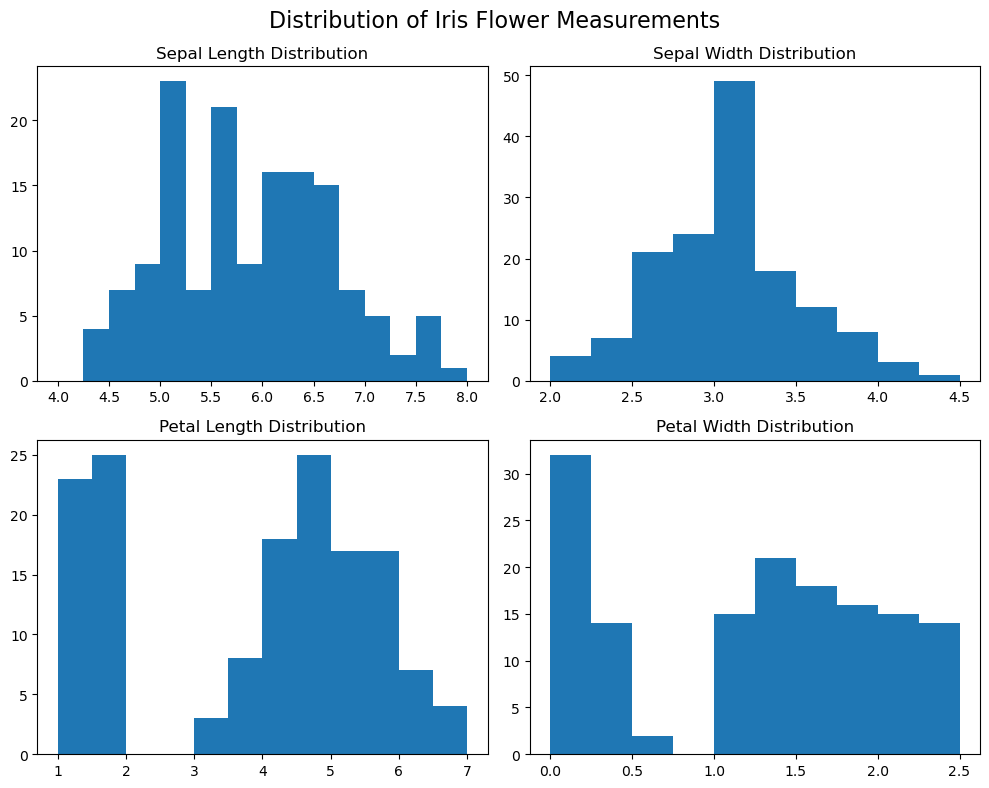

In [10]:
plt.figure(figsize=(10, 8))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=16)

plt.subplot(2, 2, 1)
plt.hist(data['sepal_length'], bins=16, range=(4, 8))
plt.title("Sepal Length Distribution")

plt.subplot(2, 2, 2)
plt.hist(data['sepal_width'], bins=10, range=(2, 4.5))
plt.title("Sepal Width Distribution")

plt.subplot(2, 2, 3)
plt.hist(data['petal_length'], bins=12, range=(1, 7))
plt.title("Petal Length Distribution")

plt.subplot(2, 2, 4)
plt.hist(data['petal_width'], bins=10, range=(0, 2.5))
plt.title("Petal Width Distribution")

plt.tight_layout()
plt.show()

### 4.2. Box Plots

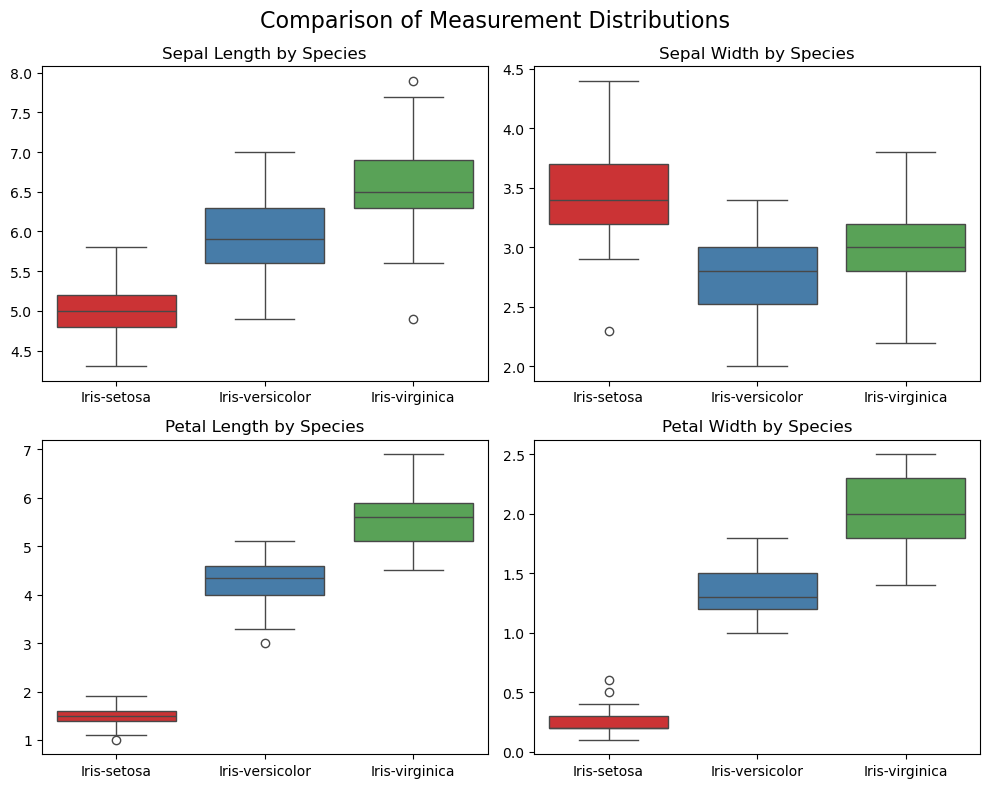

In [11]:
plt.figure(figsize=(10, 8))
plt.suptitle('Comparison of Measurement Distributions', fontsize=16)

plt.subplot(2, 2, 1)
sns.boxplot(data, x='species', y='sepal_length', hue='species', palette='Set1')
plt.title("Sepal Length by Species")
plt.xlabel("")
plt.ylabel("")

plt.subplot(2, 2, 2)
sns.boxplot(data, x='species', y='sepal_width', hue='species', palette='Set1')
plt.title("Sepal Width by Species")
plt.xlabel("")
plt.ylabel("")

plt.subplot(2, 2, 3)
sns.boxplot(data, x='species', y='petal_length', hue='species', palette='Set1')
plt.title("Petal Length by Species")
plt.xlabel("")
plt.ylabel("")

plt.subplot(2, 2, 4)
sns.boxplot(data, x='species', y='petal_width', hue='species', palette='Set1')
plt.title("Petal Width by Species")
plt.xlabel("")
plt.ylabel("")

plt.tight_layout()
plt.show()

### 4.3. Pair Plot

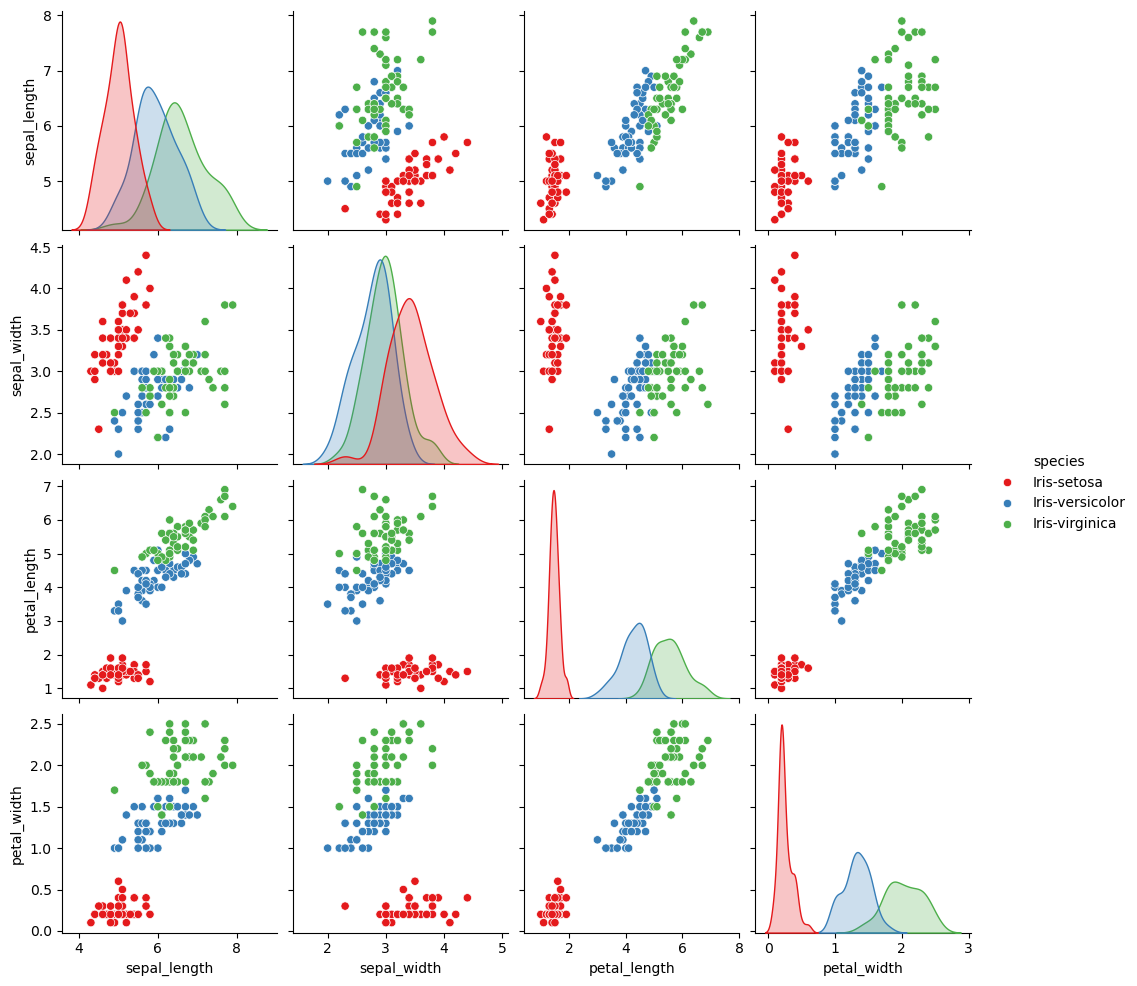

In [12]:
sns.pairplot(data, hue='species', palette='Set1')

## 5. Data Preprocessing

In [13]:
le = LabelEncoder()
data['species'] = le.fit_transform(data['species']) # 0 = setosa, 1 = versicolor, 2 = virginica
print(f"Encoded Values: {data['species'].unique()}")

Encoded Values: [0 1 2]


In [14]:
x = data.drop(columns=['species'], axis=1)
y = data['species']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
y_train.value_counts()

species
1    42
0    38
2    37
Name: count, dtype: int64

## 6. Model Implementation

In [71]:
def evaluate_model(model, x, x_train, x_test, y, y_train, y_test):
    """
    This function performs four main actions on the specified classification model. First, it fits the model and makes predictions. Second,
    it outputs two confusion matricies, one on training data performance and the other on testing data performance. Third, it outputs two
    classification reports, again one on training data and the other on testing. Finally, the function uses the classification reports and the
    cross_validate function to find important evaluation metrics, which are returned in an array to be added to the scores dataframe afterwards.
    """

    # MODEL PREDICTIONS
    model.fit(x_train, y_train)
 
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # CONFUSION MATRICES
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    labels = ['0 (setosa)', '1 (versicolor)', '2 (virginica)']
    
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    hm_train = sns.heatmap(cm_train, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues")
    hm_train.set_xlabel("Predicted Class")
    hm_train.set_ylabel("True Class")
    hm_train.set_title("Training Data Confusion Matrix")
    
    plt.subplot(1, 2, 2)
    hm_test = sns.heatmap(cm_test, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues")
    hm_test.set_xlabel("Predicted Class")
    hm_test.set_ylabel("True Class")
    hm_test.set_title("Testing Data Confusion Matrix")

    plt.tight_layout()
    plt.show()

    # CLASSIFICATION REPORTS
    iris_names = ['0 (setosa)', '1 (versicolor)', '2 (virginica)']
    cr_train = classification_report(y_train, y_train_pred, output_dict=True, target_names=iris_names)
    cr_test = classification_report(y_test, y_test_pred, output_dict=True, target_names=iris_names)

    cr_train_df = pd.DataFrame(cr_train).T.round(4)
    cr_test_df = pd.DataFrame(cr_test).T.round(4)
    
    plt.figure(figsize=(10, 2))

    plt.subplot(1, 2, 1).table(cellText=cr_train_df.values,
                               colLabels=cr_train_df.columns,
                               rowLabels=cr_train_df.index,
                               cellLoc='center',
                               loc='center').scale(1, 1.2)
    plt.axis('off')
    plt.title("Training Data Classification Report")
    
    plt.subplot(1, 2, 2).table(cellText=cr_test_df.values,
                               colLabels=cr_test_df.columns,
                               rowLabels=cr_test_df.index,
                               cellLoc='center',
                               loc='center').scale(1, 1.2)
    plt.axis('off')
    plt.title("Testing Data Classification Report")
    
    plt.tight_layout()
    plt.show()

    # MODEl RESULTS
    # calculating cross-validated results
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    cv_results = cross_validate(model, x, y, cv=5, scoring=scoring)
    
    # finding accuracy scores
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    accuracy_cv = cv_results['test_accuracy'].mean()
    
    # finding precision scores
    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']
    precision_cv = cv_results['test_precision_weighted'].mean()
    
    # finding recall scores
    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']
    recall_cv = cv_results['test_recall_weighted'].mean()
    
    # finding F1 scores
    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']
    F1_cv = cv_results['test_f1_weighted'].mean()
    
    score = [accuracy_train, accuracy_test, accuracy_cv, precision_train, precision_test, precision_cv,
             recall_train, recall_test, recall_cv, F1_train, F1_test, F1_cv]
    return score

In [17]:
indices = ['Accuracy (Train)', 'Accuracy (Test)', 'Accuracy (CV)', 'Precision (Train)', 'Precision (Test)', 'Precision (CV)',
           'Recall (Train)','Recall (Test)', 'Recall (CV)', 'F1-Score (Train)', 'F1-Score (Test)', 'F1-Score (CV)']
scores = pd.DataFrame(index=indices)

### 6.1. Logistic Regression

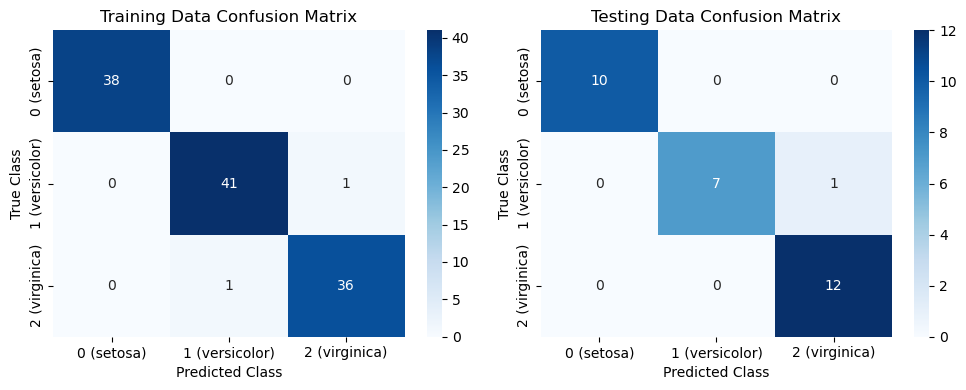

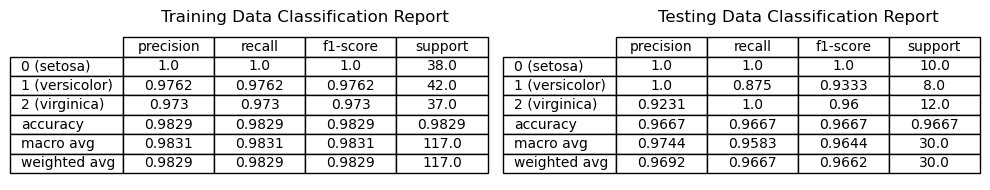

In [18]:
lr_model = LogisticRegression(max_iter=10000)
lr_score = evaluate_model(lr_model, x, x_train, x_test, y, y_train, y_test)

In [19]:
scores['Logistic Regression'] = lr_score
scores

,Logistic Regression
Accuracy (Train),0.982906
Accuracy (Test),0.966667
Accuracy (CV),0.959080
Precision (Train),0.982906
Precision (Test),0.969231
Precision (CV),0.962800
Recall (Train),0.982906
Recall (Test),0.966667
Recall (CV),0.959080
F1-Score (Train),0.982906


### 6.2. Decision Tree

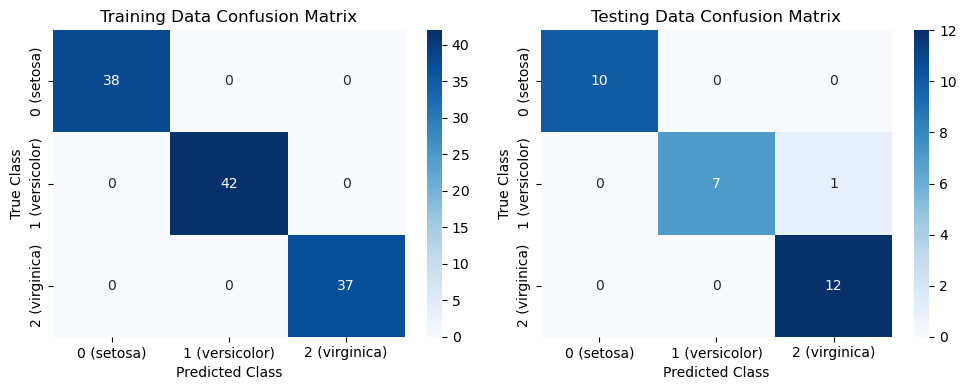

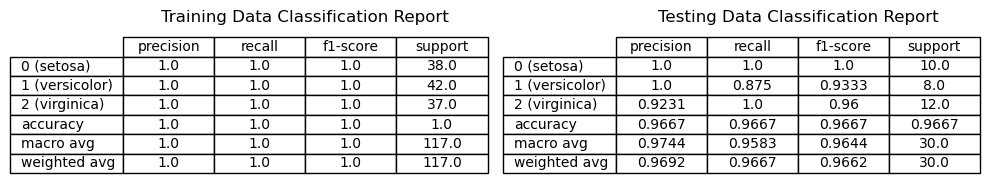

In [20]:
dt_model = DecisionTreeClassifier()
dt_score = evaluate_model(dt_model, x, x_train, x_test, y, y_train, y_test)

In [21]:
scores['Decision Tree'] = dt_score
scores

,Logistic Regression,Decision Tree
Accuracy (Train),0.982906,1.000000
Accuracy (Test),0.966667,0.966667
Accuracy (CV),0.959080,0.959080
Precision (Train),0.982906,1.000000
Precision (Test),0.969231,0.969231
Precision (CV),0.962800,0.962800
Recall (Train),0.982906,1.000000
Recall (Test),0.966667,0.966667
Recall (CV),0.959080,0.959080
F1-Score (Train),0.982906,1.000000


### 6.3. Random Forest

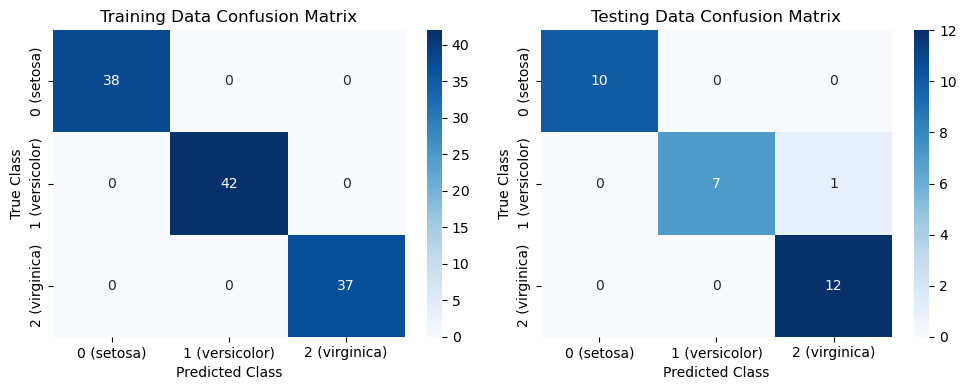

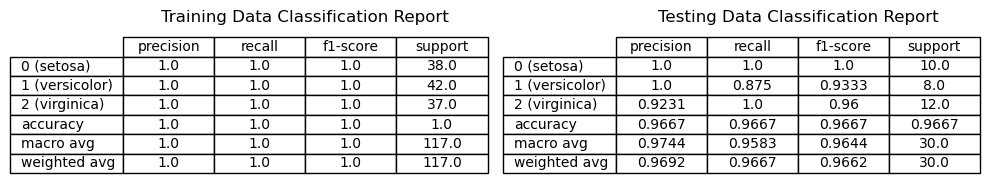

In [22]:
rf_model = RandomForestClassifier()
rf_score = evaluate_model(rf_model, x, x_train, x_test, y, y_train, y_test)

In [23]:
scores['Random Forest'] = rf_score
scores

,Logistic Regression,Decision Tree,Random Forest
Accuracy (Train),0.982906,1.000000,1.000000
Accuracy (Test),0.966667,0.966667,0.966667
Accuracy (CV),0.959080,0.959080,0.945287
Precision (Train),0.982906,1.000000,1.000000
Precision (Test),0.969231,0.969231,0.969231
Precision (CV),0.962800,0.962800,0.956446
Recall (Train),0.982906,1.000000,1.000000
Recall (Test),0.966667,0.966667,0.966667
Recall (CV),0.959080,0.959080,0.945287
F1-Score (Train),0.982906,1.000000,1.000000


### 6.4. K-Nearest Neighbors

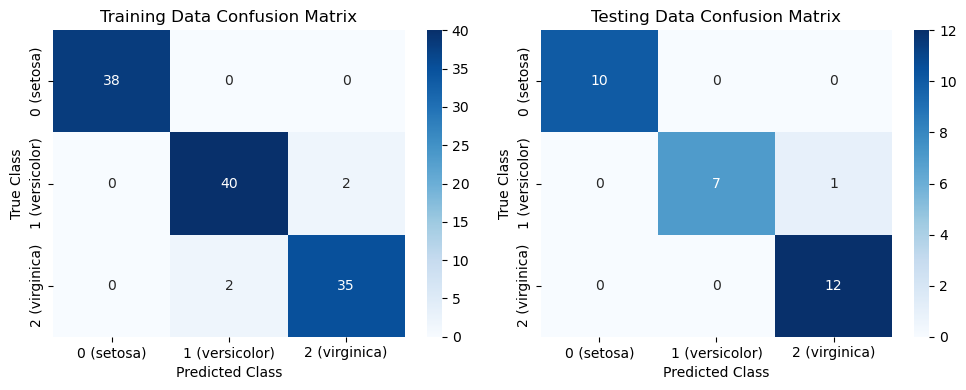

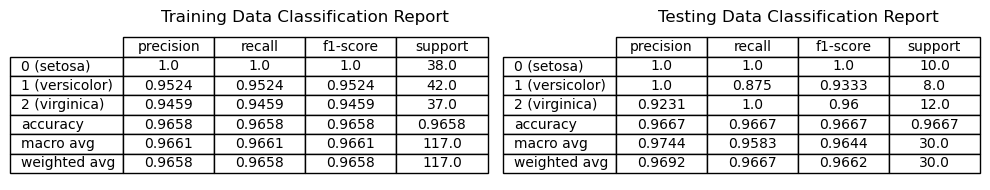

In [24]:
knn_model = KNeighborsClassifier()
knn_score = evaluate_model(knn_model, x, x_train, x_test, y, y_train, y_test)

In [25]:
scores['K-Nearest Neighbors'] = knn_score
scores

,Logistic Regression,Decision Tree,Random Forest,K-Nearest Neighbors
Accuracy (Train),0.982906,1.000000,1.000000,0.965812
Accuracy (Test),0.966667,0.966667,0.966667,0.966667
Accuracy (CV),0.959080,0.959080,0.945287,0.972644
Precision (Train),0.982906,1.000000,1.000000,0.965812
Precision (Test),0.969231,0.969231,0.969231,0.969231
Precision (CV),0.962800,0.962800,0.956446,0.976385
Recall (Train),0.982906,1.000000,1.000000,0.965812
Recall (Test),0.966667,0.966667,0.966667,0.966667
Recall (CV),0.959080,0.959080,0.945287,0.972644
F1-Score (Train),0.982906,1.000000,1.000000,0.965812


### 6.5. Naive Bayes

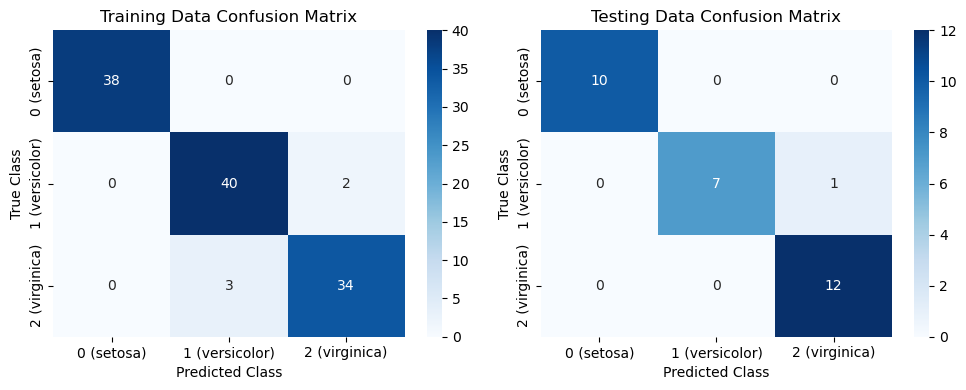

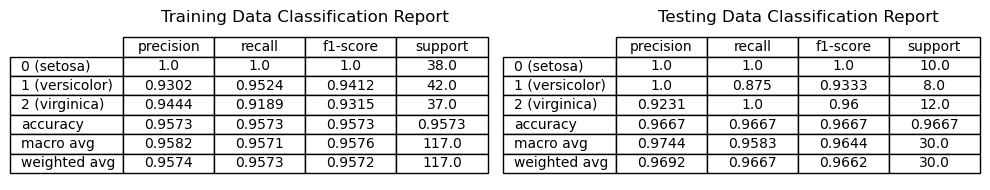

In [26]:
nb_model = GaussianNB()
nb_score = evaluate_model(nb_model, x, x_train, x_test, y, y_train, y_test)

In [27]:
scores['Naive Bayes'] = nb_score
scores

,Logistic Regression,Decision Tree,Random Forest,K-Nearest Neighbors,Naive Bayes
Accuracy (Train),0.982906,1.000000,1.000000,0.965812,0.957265
Accuracy (Test),0.966667,0.966667,0.966667,0.966667,0.966667
Accuracy (CV),0.959080,0.959080,0.945287,0.972644,0.952414
Precision (Train),0.982906,1.000000,1.000000,0.965812,0.957386
Precision (Test),0.969231,0.969231,0.969231,0.969231,0.969231
Precision (CV),0.962800,0.962800,0.956446,0.976385,0.957827
Recall (Train),0.982906,1.000000,1.000000,0.965812,0.957265
Recall (Test),0.966667,0.966667,0.966667,0.966667,0.966667
Recall (CV),0.959080,0.959080,0.945287,0.972644,0.952414
F1-Score (Train),0.982906,1.000000,1.000000,0.965812,0.957224


### 6.6. Support Vector Machine

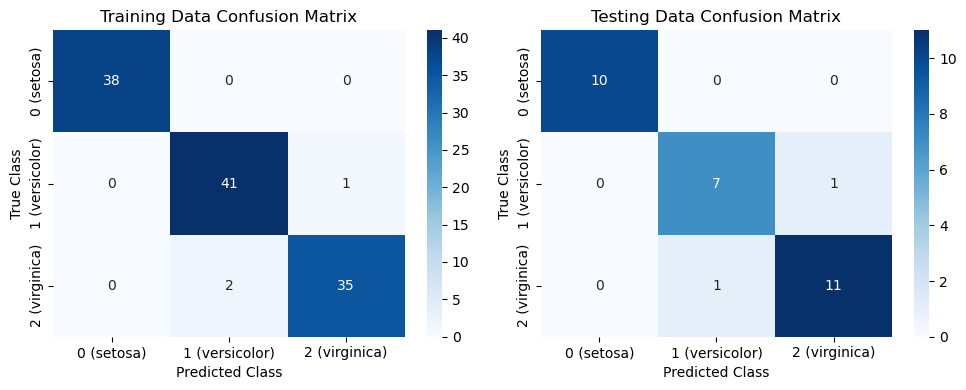

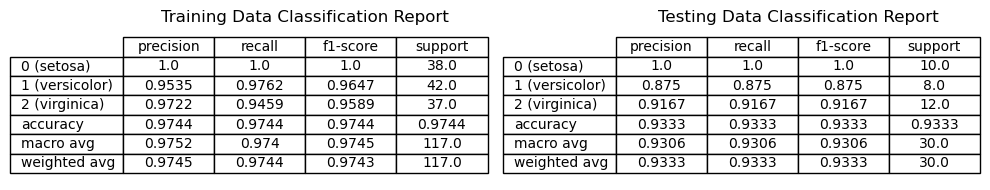

In [28]:
svm_model = SVC()
svm_score = evaluate_model(svm_model, x, x_train, x_test, y, y_train, y_test)

In [29]:
scores['Support Vector Machine'] = svm_score
scores

,Logistic Regression,Decision Tree,Random Forest,K-Nearest Neighbors,Naive Bayes,Support Vector Machine
Accuracy (Train),0.982906,1.000000,1.000000,0.965812,0.957265,0.974359
Accuracy (Test),0.966667,0.966667,0.966667,0.966667,0.966667,0.933333
Accuracy (CV),0.959080,0.959080,0.945287,0.972644,0.952414,0.959080
Precision (Train),0.982906,1.000000,1.000000,0.965812,0.957386,0.974519
Precision (Test),0.969231,0.969231,0.969231,0.969231,0.969231,0.933333
Precision (CV),0.962800,0.962800,0.956446,0.976385,0.957827,0.961470
Recall (Train),0.982906,1.000000,1.000000,0.965812,0.957265,0.974359
Recall (Test),0.966667,0.966667,0.966667,0.966667,0.966667,0.933333
Recall (CV),0.959080,0.959080,0.945287,0.972644,0.952414,0.959080
F1-Score (Train),0.982906,1.000000,1.000000,0.965812,0.957224,0.974334


## 7. Model Evaluation

### 7.1. Selecting the Best Model

In [45]:
def find_overfitted_models(df, train_col, test_col, cv_col, train_max=0.98, gap_max=0.07):
    """
    This function evaluates three metrics for testing overfitting: the training data maximum, the training/testing data gap, and the
    training/cross-validated data gap. These metrics are calculated for each model in the scoring dataframe, then compared to the values of the
    default parameters (which are arbitrary). Then, the function returns a new dataframe, one that contains all of the models that satisfy the
    overfitting condition, which is to be removed from the main dataframe aftwerwards.
    """
    df["Train-Test Gap"] = df[train_col] - df[test_col]
    df["Train-CV Gap"] = df[train_col] - df[cv_col]

    overfit_condition = ((df[train_col] >= train_max) & ((df['Train-Test Gap'] > gap_max) | (df['Train-CV Gap'] > gap_max)))
    overfit_models = df[overfit_condition]
    return overfit_models

In [31]:
# finding overfitted models
of_scores = find_overfitted_models(scores.T, train_col="Accuracy (Train)", test_col="Accuracy (Test)", cv_col="Accuracy (CV)")
of_scores

,Accuracy (Train),Accuracy (Test),Accuracy (CV),Precision (Train),Precision (Test),Precision (CV),Recall (Train),Recall (Test),Recall (CV),F1-Score (Train),F1-Score (Test),F1-Score (CV),Train-Test Gap,Train-CV Gap


In [32]:
# removing overfitted models
upd_scores = scores.T.drop(of_scores.index)
upd_scores

,Accuracy (Train),Accuracy (Test),Accuracy (CV),Precision (Train),Precision (Test),Precision (CV),Recall (Train),Recall (Test),Recall (CV),F1-Score (Train),F1-Score (Test),F1-Score (CV)
Logistic Regression,0.982906,0.966667,0.959080,0.982906,0.969231,0.962800,0.982906,0.966667,0.959080,0.982906,0.966222,0.958970
Decision Tree,1.000000,0.966667,0.959080,1.000000,0.969231,0.962800,1.000000,0.966667,0.959080,1.000000,0.966222,0.958970
Random Forest,1.000000,0.966667,0.945287,1.000000,0.969231,0.956446,1.000000,0.966667,0.945287,1.000000,0.966222,0.944430
K-Nearest Neighbors,0.965812,0.966667,0.972644,0.965812,0.969231,0.976385,0.965812,0.966667,0.972644,0.965812,0.966222,0.972533
Naive Bayes,0.957265,0.966667,0.952414,0.957386,0.969231,0.957827,0.957265,0.966667,0.952414,0.957224,0.966222,0.952181
Support Vector Machine,0.974359,0.933333,0.959080,0.974519,0.933333,0.961470,0.974359,0.933333,0.959080,0.974334,0.933333,0.958995


In [33]:
# removing training data scores
upd_scores = upd_scores.drop(labels=["Accuracy (Train)", "Precision (Train)", "Recall (Train)", "F1-Score (Train)"], axis=1)
upd_scores

,Accuracy (Test),Accuracy (CV),Precision (Test),Precision (CV),Recall (Test),Recall (CV),F1-Score (Test),F1-Score (CV)
Logistic Regression,0.966667,0.959080,0.969231,0.962800,0.966667,0.959080,0.966222,0.958970
Decision Tree,0.966667,0.959080,0.969231,0.962800,0.966667,0.959080,0.966222,0.958970
Random Forest,0.966667,0.945287,0.969231,0.956446,0.966667,0.945287,0.966222,0.944430
K-Nearest Neighbors,0.966667,0.972644,0.969231,0.976385,0.966667,0.972644,0.966222,0.972533
Naive Bayes,0.966667,0.952414,0.969231,0.957827,0.966667,0.952414,0.966222,0.952181
Support Vector Machine,0.933333,0.959080,0.933333,0.961470,0.933333,0.959080,0.933333,0.958995


In [34]:
def select_best_models(df, metrics):
    print("The best models are...")
    for metric in metrics:
        best_score = df[metric].max()
        best_model = df[df[metric] == best_score].index[0]
        print(f"{metric}: {best_model} - {best_score * 100:.2f}%")

metrics = ['Accuracy (Test)', 'Accuracy (CV)', 'Precision (Test)', 'Precision (CV)',
           'Recall (Test)', 'Recall (CV)', 'F1-Score (Test)', 'F1-Score (CV)']
best_models = select_best_models(upd_scores, metrics)

The best models are...
Accuracy (Test): Logistic Regression - 96.67%
Accuracy (CV): K-Nearest Neighbors - 97.26%
Precision (Test): Logistic Regression - 96.92%
Precision (CV): K-Nearest Neighbors - 97.64%
Recall (Test): Logistic Regression - 96.67%
Recall (CV): K-Nearest Neighbors - 97.26%
F1-Score (Test): Logistic Regression - 96.62%
F1-Score (CV): K-Nearest Neighbors - 97.25%


As seen in the dataframe above, it seems as though most of the models (not including SVM) were equally effective at making accurate predictions on the testing data. However, in addition to being accurate on the testing data, the K-Nearest Neighbors model made the most accurate predictions on the data when cross-validated. For this reason, it is evident that the K-Nearest Neighbors model is our best performing and most practical model for classifying Iris flower species.

### 7.2. Testing the Best Model

In [67]:
classes = ["Iris Setosa", "Iris Versicolor", "Iris Virginica"]
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# creating flowers with random but standard measurements
random_flower_1 = pd.DataFrame([[5.2, 3.4, 1.6, 0.2]], columns=features) # should be a setosa
random_flower_2 = pd.DataFrame([[6.3, 2.8, 5.3, 1.9]], columns=features) # should be a virginica

# predicting the flower classes using our best model from earlier
prediction_1 = knn_model.predict(random_flower_1)
prediction_2 = knn_model.predict(random_flower_2)

print("First Flower:", classes[prediction_1[0]])
print("Second Flower:", classes[prediction_2[0]])

First Flower: Iris Setosa
Second Flower: Iris Virginica


# Conclusion

In this project, we aimed to classify a dataset of Iris flowers into three species: setosa, veresiclor, and virginica. Additionally, we tested six different classification models and compared their accuracy in executing this classification. Below are my thoughts and conclusions from overall process.

 - **Data Exploration:** Through a brief examination, I gained insights into the characteristics and quality of our dataset.
 - **Data Wrangling/Preprocessing:** Various transformations, such as removing duplicate values and encoding categorical variables, were performed to prepare the dataset for modeling.
 - **Data Visualization:** Through further examination of the dataset, I gained critical information about the distributions of different Iris flower features, such as how setosa petals are considerably smaller than versicolor/virginica petals.
 - **Model Implementation:** I constructed six classification models, including logistic regression and random forest, then tested them on three sets of data: training, testing, and most importantly, cross-validated.
 - **Model Evaluation:** After evaluating each model on the appropriate metrics, and taking precautions against overfitting, I concluded that the K-Nearest Neighbors model was my best performing classification model.

In conclusion, while this project was ultimately a simple task, it was instructive and rewarding nonetheless. I learned about data preprocessing, performance evaluation metrics, and other important machine learning basics. Furthermore, I gained hands-on experience with fundamental Python libraries, data visualization tools, and the general workflow of supervised learning projects. In the future, I hope to better apply this knowledge to bigger, more complex datasets, and to experiment with additional topics such as hyperparameter tuning or dimensionality reduction.